In [1]:
import matplotlib.pyplot as plt
import numpy as np
from dipy.io.image import load_nifti
import pandas as pd
import sklearn.cluster
import pathlib
from scipy.stats import norm, ttest_ind, iqr
from sklearn.mixture import GaussianMixture
import os

In [2]:
'''
Path to clean images segmented with slic
'''
path_to_control_slic = "/N/project/laidel_el_mcv/LAIDEL-MRI-tumor-id/results/control_slic_classified/"

'''
Path to clean images segmented with kmeans
'''
path_to_control_kmeans = "/N/project/laidel_el_mcv/LAIDEL-MRI-tumor-id/results/control_kmeans_classified/"

'''
Path to tumor images segmented with slic
'''
path_to_tumor_slic = "/N/project/laidel_el_mcv/LAIDEL-MRI-tumor-id/results/slic_classified/"
'''
Path to tumor images segmented with kmeans
'''
path_to_tumor_kmeans = "/N/project/laidel_el_mcv/LAIDEL-MRI-tumor-id/results/kmeans_classified/"

'''
Path to original clean image
'''
path_to_augmented_clean = "/N/project/laidel_el_mcv/LAIDEL-MRI-tumor-id/seg_images/"
'''
Path to original library image
'''
path_to_lib = "/N/project/laidel_el_mcv/LAIDEL-MRI-tumor-id/lib/MICCAI_BraTS2020_TrainingData/"

In [3]:
'''
Record means of all tumor images 
'''

def gather_tumor_loop(path):  
    tolerance = 0
    
    data_id = path.parts[len(path.parts)-1]
    data_id = os.path.splitext(data_id)[0]
    print(data_id)
    #classified
    classified_img = np.load(path)
    #original image 
    og_image_path = path_to_lib+data_id+"/"+data_id+"_flair.nii"
    og_image, affine, im = load_nifti(og_image_path, return_img=True)
    #normalized original image
    max_val = np.max(og_image)
    min_val = np.min(og_image)
    og_image_norm = (og_image - min_val)/(max_val - min_val)
    
    #extract tumor
    tumor_label=np.max(classified_img)
    print(tumor_label)
    tumor = og_image_norm[classified_img==tumor_label]
    tumor = tumor[tumor>tolerance]
    tumor_mean = np.mean(tumor)
    print("tumor mean ", tumor_mean)
    tumor_std = np.std(tumor)
    print("tumor std", tumor_std)
    #extract nontumor
    nontumor=og_image_norm[classified_img != tumor_label]
    nontumor= nontumor[nontumor > tolerance]
    nontumor_mean= np.mean(nontumor)
    print("nontumor mean ", nontumor_mean)
    nontumor_std=np.std(nontumor)
    print("nontumor std", nontumor_std)
    
    return np.array([tumor_mean, nontumor_mean, tumor_std, nontumor_std])

In [4]:
'''
Record means of all nontumor images 
'''

def gather_clean_loop(path):  
    tolerance = 0
    data_id = path.parts[len(path.parts)-1]
    
    print(data_id)
    #classified
    classified_img = np.load(path)
    #original image 
    og_image_path = path_to_augmented_clean+data_id
    og_image = np.load(og_image_path)
    #normalized original image
    max_val = np.max(og_image)
    min_val = np.min(og_image)
    og_image_norm = (og_image - min_val)/(max_val - min_val)
    #extract tumor
    tumor_label=np.max(classified_img)
    print("tumor label", tumor_label)
    tumor = og_image_norm[classified_img==tumor_label]
    tumor = tumor[tumor>tolerance]
    tumor_mean = np.mean(tumor)
    print("tumor mean ", tumor_mean)
    tumor_std = np.std(tumor)
    print("tumor std", tumor_std)
    #extract nontumor
    nontumor=og_image_norm[classified_img != tumor_label]
    nontumor= nontumor[nontumor > tolerance]
    nontumor_mean= np.mean(nontumor)
    print("nontumor mean", nontumor_mean)
    nontumor_std=np.std(nontumor)
    print("nontumor std", nontumor_std)
    return np.array([tumor_mean, nontumor_mean, tumor_std, nontumor_std])

# SLIC clean image

In [5]:


#list comprehension
clean_slic_metrics = [gather_clean_loop(path) for path in pathlib.Path(path_to_control_slic).iterdir()]


BraTS20_Training_101_clean.npy
tumor label 1.0
tumor mean  0.18148333123942803
tumor std 0.04507992997045123
nontumor mean 0.1252660287832239
nontumor std 0.05356915015839913
BraTS20_Training_349_clean.npy
tumor label 1.0
tumor mean  0.3227672
tumor std 0.054450307
nontumor mean 0.19454266
nontumor std 0.067974
BraTS20_Training_127_clean.npy
tumor label 1.0
tumor mean  0.2706244133351645
tumor std 0.061339652113724524
nontumor mean 0.16148247515939806
nontumor std 0.08013051084568905
BraTS20_Training_035_clean.npy
tumor label 1.0
tumor mean  0.224562221630466
tumor std 0.05375511755286472
nontumor mean 0.16535263736218597
nontumor std 0.044660450609008785
BraTS20_Training_111_clean.npy
tumor label 1.0
tumor mean  0.22145426830888726
tumor std 0.05161148606025162
nontumor mean 0.16762424082644523
nontumor std 0.04518394276123262
BraTS20_Training_299_clean.npy
tumor label 1.0
tumor mean  0.4008806545557538
tumor std 0.07767627525888601
nontumor mean 0.18744557344170235
nontumor std 0.113

tumor label 1.0
tumor mean  0.29053608
tumor std 0.04079699
nontumor mean 0.2120779
nontumor std 0.05991182
BraTS20_Training_038_clean.npy
tumor label 1.0
tumor mean  0.20003926866615057
tumor std 0.05360196812464846
nontumor mean 0.13718419760570688
nontumor std 0.058536061099990044
BraTS20_Training_116_clean.npy
tumor label 1.0
tumor mean  0.2868908585815233
tumor std 0.062302595862105306
nontumor mean 0.2145764899529288
nontumor std 0.06426139748470909
BraTS20_Training_302_clean.npy
tumor label 1.0
tumor mean  0.35539502284405294
tumor std 0.0669728909697561
nontumor mean 0.15446204236925454
nontumor std 0.09888990830230895
BraTS20_Training_238_clean.npy
tumor label 1.0
tumor mean  0.5174692796037268
tumor std 0.08452550814866891
nontumor mean 0.3095900065842422
nontumor std 0.12612948244903294
BraTS20_Training_237_clean.npy
tumor label 1.0
tumor mean  0.5185184808121994
tumor std 0.09383363166237092
nontumor mean 0.2632282858640451
nontumor std 0.15066898981388105
BraTS20_Training_

tumor label 1.0
tumor mean  0.44116682091527804
tumor std 0.06092774438254974
nontumor mean 0.31718758516323414
nontumor std 0.09421041588319912
BraTS20_Training_148_clean.npy
tumor label 1.0
tumor mean  0.28905938844765705
tumor std 0.05873489552203307
nontumor mean 0.1890378343640404
nontumor std 0.06541994464468584
BraTS20_Training_037_clean.npy
tumor label 1.0
tumor mean  0.23226537034209557
tumor std 0.05072631985498636
nontumor mean 0.17317713194933568
nontumor std 0.06404884547906002
BraTS20_Training_314_clean.npy
tumor label 1.0
tumor mean  0.38487318018852795
tumor std 0.06445722170340838
nontumor mean 0.1711241092859672
nontumor std 0.09654644757903122
BraTS20_Training_356_clean.npy
tumor label 1.0
tumor mean  0.27039334
tumor std 0.03971685
nontumor mean 0.18270455
nontumor std 0.056616224
BraTS20_Training_006_clean.npy
tumor label 1.0
tumor mean  0.26043718771727425
tumor std 0.050213568951570406
nontumor mean 0.2032546150695258
nontumor std 0.05783969432126974
BraTS20_Trai

tumor label 1.0
tumor mean  0.48140983376024854
tumor std 0.06940659046809615
nontumor mean 0.36093580952259047
nontumor std 0.08199681766120966
BraTS20_Training_081_clean.npy
tumor label 1.0
tumor mean  0.21275559848675782
tumor std 0.047703616959407245
nontumor mean 0.16121529700021803
nontumor std 0.046678012377147166
BraTS20_Training_120_clean.npy
tumor label 1.0
tumor mean  0.2832618171897735
tumor std 0.07688640886662262
nontumor mean 0.2001741602952545
nontumor std 0.06373841029925356
BraTS20_Training_313_clean.npy
tumor label 1.0
tumor mean  0.42316681230065045
tumor std 0.06856911985371121
nontumor mean 0.23638120412027902
nontumor std 0.10758431258192472
BraTS20_Training_245_clean.npy
tumor label 1.0
tumor mean  0.35148923415652217
tumor std 0.04420091453676978
nontumor mean 0.28239969535233456
nontumor std 0.07856436349676107
BraTS20_Training_181_clean.npy
tumor label 1.0
tumor mean  0.4671484711347464
tumor std 0.0993636983732328
nontumor mean 0.2428996227414073
nontumor st

tumor label 1.0
tumor mean  0.3663573701262014
tumor std 0.05205348066442478
nontumor mean 0.26742914458135114
nontumor std 0.06824520034000116
BraTS20_Training_333_clean.npy
tumor label 1.0
tumor mean  0.34661000954414894
tumor std 0.05847743636568564
nontumor mean 0.24019694359786933
nontumor std 0.07251382033991946
BraTS20_Training_359_clean.npy
tumor label 1.0
tumor mean  0.31042317
tumor std 0.043548256
nontumor mean 0.25265396
nontumor std 0.055676237
BraTS20_Training_054_clean.npy
tumor label 1.0
tumor mean  0.18430703732927603
tumor std 0.046104660974914856
nontumor mean 0.1381452920714363
nontumor std 0.04553078441276524
BraTS20_Training_198_clean.npy
tumor label 1.0
tumor mean  0.3149272695322709
tumor std 0.04679911168914442
nontumor mean 0.26012496462804535
nontumor std 0.058169458915945216
BraTS20_Training_179_clean.npy
tumor label 1.0
tumor mean  0.1989825835979682
tumor std 0.10861553157737432
nontumor mean 0.09392556937859504
nontumor std 0.027041599213083554
BraTS20_Tr

tumor label 1.0
tumor mean  0.26089656828186697
tumor std 0.050757643999421655
nontumor mean 0.19948195762266321
nontumor std 0.04871483410148828
BraTS20_Training_361_clean.npy
tumor label 1.0
tumor mean  0.5668244
tumor std 0.08566379
nontumor mean 0.4360716
nontumor std 0.08060472
BraTS20_Training_160_clean.npy
tumor label 1.0
tumor mean  0.3519313052956859
tumor std 0.06248762186541851
nontumor mean 0.20488292274283793
nontumor std 0.09282016698488174
BraTS20_Training_312_clean.npy
tumor label 1.0
tumor mean  0.4944123384279616
tumor std 0.06830991838928642
nontumor mean 0.30201240662430473
nontumor std 0.11973149316500425
BraTS20_Training_216_clean.npy
tumor label 1.0
tumor mean  0.26494048258537556
tumor std 0.03887615290373319
nontumor mean 0.17893841036615848
nontumor std 0.07509031366144084
BraTS20_Training_205_clean.npy
tumor label 1.0
tumor mean  0.3324208657790624
tumor std 0.07360125406149376
nontumor mean 0.13247878103457644
nontumor std 0.09312817511217518
BraTS20_Trainin

tumor label 1.0
tumor mean  0.4302556472393841
tumor std 0.08988639232179284
nontumor mean 0.19262957628572047
nontumor std 0.12788747861256797
BraTS20_Training_337_clean.npy
tumor label 1.0
tumor mean  0.35353056
tumor std 0.052451473
nontumor mean 0.28225434
nontumor std 0.057952788
BraTS20_Training_159_clean.npy
tumor label 1.0
tumor mean  0.32837241500638764
tumor std 0.06281064826270776
nontumor mean 0.1752566660485974
nontumor std 0.09099993767973226
BraTS20_Training_190_clean.npy
tumor label 1.0
tumor mean  0.25120666544612325
tumor std 0.05575000434800412
nontumor mean 0.1473461380925349
nontumor std 0.0813686401974495
BraTS20_Training_177_clean.npy
tumor label 1.0
tumor mean  0.3551685637519959
tumor std 0.0643012933699927
nontumor mean 0.20691713076932147
nontumor std 0.1037597075702021
BraTS20_Training_036_clean.npy
tumor label 1.0
tumor mean  0.22461673600963733
tumor std 0.0593714630334522
nontumor mean 0.16766653311026017
nontumor std 0.05580051689621908
BraTS20_Training_

tumor label 1.0
tumor mean  0.3679622896433679
tumor std 0.06341796788073888
nontumor mean 0.14276091004630492
nontumor std 0.10490797393510358
BraTS20_Training_103_clean.npy
tumor label 1.0
tumor mean  0.259522996491153
tumor std 0.05684520815272379
nontumor mean 0.15206447564487843
nontumor std 0.08224265768468153
BraTS20_Training_185_clean.npy
tumor label 1.0
tumor mean  0.29661776569552684
tumor std 0.04741358520588495
nontumor mean 0.1687276409725654
nontumor std 0.09361864896911337
BraTS20_Training_310_clean.npy
tumor label 1.0
tumor mean  0.44336005115471167
tumor std 0.15356948245875782
nontumor mean 0.21134901863177302
nontumor std 0.058913780572927885
BraTS20_Training_129_clean.npy
tumor label 1.0
tumor mean  0.37686179360662864
tumor std 0.08464756822048095
nontumor mean 0.17966773805371053
nontumor std 0.11555019807681381
BraTS20_Training_173_clean.npy
tumor label 1.0
tumor mean  0.5004868582032432
tumor std 0.0797260303430694
nontumor mean 0.31525203736867236
nontumor std 

In [6]:
clean_slic_metrics = np.asarray(clean_slic_metrics)

In [7]:
clean_slic_means = clean_slic_metrics[:,0:2]
clean_slic_means

array([[0.18148333, 0.12526603],
       [0.3227672 , 0.19454266],
       [0.27062441, 0.16148248],
       [0.22456222, 0.16535264],
       [0.22145427, 0.16762424],
       [0.40088065, 0.18744557],
       [0.30400217, 0.17893102],
       [0.24137711, 0.16402062],
       [0.57469237, 0.38727018],
       [0.46377975, 0.20523849],
       [0.400296  , 0.21715681],
       [0.35467414, 0.28897694],
       [0.36476948, 0.25269219],
       [0.25484309, 0.19239422],
       [0.24677881, 0.17266939],
       [0.32718914, 0.2273384 ],
       [0.3498043 , 0.26458557],
       [0.21008661, 0.15911901],
       [0.32240781, 0.25325223],
       [0.37914695, 0.30589047],
       [0.42921461, 0.22797825],
       [0.42108098, 0.31252998],
       [0.30513024, 0.18710202],
       [0.41926802, 0.25644177],
       [0.22400481, 0.17082536],
       [0.49953961, 0.31531852],
       [0.27506877, 0.18676915],
       [0.50161471, 0.32398217],
       [0.32111123, 0.234192  ],
       [0.23997591, 0.1518175 ],
       [0.

In [8]:
clean_slic_std = clean_slic_metrics[:,2:4] 
clean_slic_var = clean_slic_std **2
clean_slic_var

array([[0.0020322 , 0.00286965],
       [0.00296484, 0.00462046],
       [0.00376255, 0.0064209 ],
       [0.00288961, 0.00199456],
       [0.00266375, 0.00204159],
       [0.0060336 , 0.01283189],
       [0.00225944, 0.00827131],
       [0.0036981 , 0.00633242],
       [0.01109365, 0.00992753],
       [0.00753512, 0.01740914],
       [0.00471761, 0.01192011],
       [0.00440279, 0.00599467],
       [0.00290795, 0.00672168],
       [0.00212893, 0.00386387],
       [0.00300012, 0.0046961 ],
       [0.00386623, 0.00445505],
       [0.00463134, 0.00418367],
       [0.00192926, 0.00250397],
       [0.00184877, 0.00459557],
       [0.00218288, 0.00378104],
       [0.00516356, 0.01239926],
       [0.00294051, 0.00604147],
       [0.00187698, 0.0073845 ],
       [0.00538448, 0.0126235 ],
       [0.00111392, 0.00260364],
       [0.00685328, 0.01400181],
       [0.00261245, 0.00526548],
       [0.00439191, 0.01746459],
       [0.00336842, 0.00671823],
       [0.00289191, 0.00454321],
       [0.

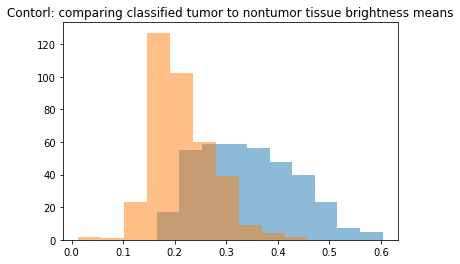

In [9]:
plt.figure()
plt.title("Contorl: comparing classified tumor to nontumor tissue brightness means")
plt.hist(clean_slic_means[:,0], alpha = 0.5)
plt.hist(clean_slic_means[:,1], alpha = 0.5)
plt.show()

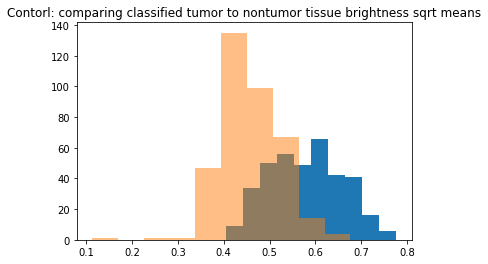

In [10]:
plt.figure()
plt.title("Contorl: comparing classified tumor to nontumor tissue brightness sqrt means")
plt.hist(np.sqrt(clean_slic_means[:,0]))
plt.hist(np.sqrt(clean_slic_means[:,1]), alpha = 0.5)
plt.show()

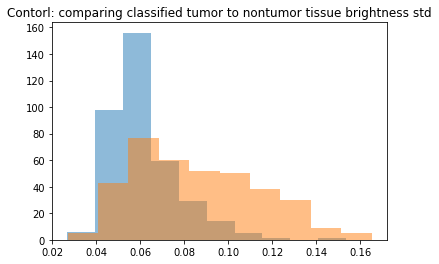

In [11]:
plt.figure()
plt.title("Contorl: comparing classified tumor to nontumor tissue brightness std")
plt.hist(clean_slic_std[:,0], alpha = 0.5)
plt.hist(clean_slic_std[:,1], alpha = 0.5)
plt.show()

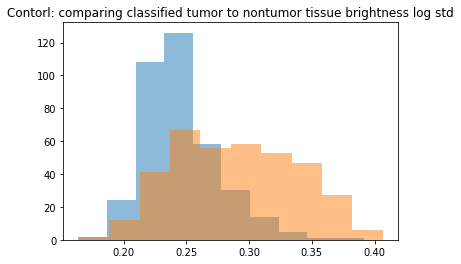

In [12]:
plt.figure()
plt.title("Contorl: comparing classified tumor to nontumor tissue brightness log std")
plt.hist(np.sqrt(clean_slic_std[:,0]), alpha = 0.5)
plt.hist(np.sqrt(clean_slic_std[:,1]), alpha = 0.5)
plt.show()

In [13]:
clean_slic_mean_dif= clean_slic_means[:,0]-clean_slic_means[:,1]
clean_slic_std_dif= clean_slic_std[:,0]-clean_slic_std[:,1]

In [14]:
np.mean(clean_slic_mean_dif)

0.12825328277385087

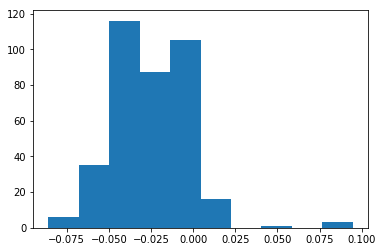

In [15]:
plt.figure()
plt.hist(clean_slic_std_dif)
plt.show()

# SLIC tumor image

In [16]:
#list comprehension
tumor_slic_metrics = [gather_tumor_loop(path) for path in pathlib.Path(path_to_tumor_slic).iterdir()]

BraTS20_Training_021
1.0
tumor mean  0.24580790384123943
tumor std 0.05135943671686293
nontumor mean  0.18033279392947116
nontumor std 0.04285554765241543
BraTS20_Training_236
1.0
tumor mean  0.4908724184032357
tumor std 0.0741596613940379
nontumor mean  0.3140803564207046
nontumor std 0.0649662386423367
BraTS20_Training_269
1.0
tumor mean  0.4853362638624983
tumor std 0.09696430501392335
nontumor mean  0.24443883610239783
nontumor std 0.14240633464441677
BraTS20_Training_104
1.0
tumor mean  0.35696409740538093
tumor std 0.09097663944573953
nontumor mean  0.13358076774552502
nontumor std 0.048535055062674956
BraTS20_Training_272
1.0
tumor mean  0.650679545280903
tumor std 0.07394330818307708
nontumor mean  0.39105990135600865
nontumor std 0.09060572271419454
BraTS20_Training_194
1.0
tumor mean  0.3552160285997225
tumor std 0.07635972756518603
nontumor mean  0.2342193030860805
nontumor std 0.0689853730749748
BraTS20_Training_063
1.0
tumor mean  0.31138963029647904
tumor std 0.0709844582

1.0
tumor mean  0.4832633285877682
tumor std 0.10803627548327353
nontumor mean  0.24867021063408581
nontumor std 0.13083608574232378
BraTS20_Training_084
1.0
tumor mean  0.3884430582779605
tumor std 0.09067309549601427
nontumor mean  0.1775707222608261
nontumor std 0.04829603844055562
BraTS20_Training_107
1.0
tumor mean  0.5029076095353168
tumor std 0.12218933993666102
nontumor mean  0.24300627970351577
nontumor std 0.06153138060229503
BraTS20_Training_240
1.0
tumor mean  0.6897037346304503
tumor std 0.12456035980429543
nontumor mean  0.3689293060815732
nontumor std 0.09799728961473551
BraTS20_Training_311
1.0
tumor mean  0.26732002424127943
tumor std 0.04541145243027074
nontumor mean  0.16905380931356143
nontumor std 0.07921282664405926
BraTS20_Training_141
1.0
tumor mean  0.2682148485942739
tumor std 0.05243438195678867
nontumor mean  0.1265046339946492
nontumor std 0.08323758308902711
BraTS20_Training_152
1.0
tumor mean  0.5398020871707406
tumor std 0.09651349187481222
nontumor mean

1.0
tumor mean  0.6144592811693123
tumor std 0.13703044928434396
nontumor mean  0.2609413551540611
nontumor std 0.09090938767121845
BraTS20_Training_127
1.0
tumor mean  0.5270933555320501
tumor std 0.10399261606634251
nontumor mean  0.21486352797214484
nontumor std 0.07578934286795755
BraTS20_Training_154
1.0
tumor mean  0.48096001629700785
tumor std 0.11016674695937165
nontumor mean  0.26808595530548
nontumor std 0.12608769528377875
BraTS20_Training_038
1.0
tumor mean  0.37522302429147447
tumor std 0.09148229773874732
nontumor mean  0.15795400187905065
nontumor std 0.06157913708449204
BraTS20_Training_349
1.0
tumor mean  0.45885906
tumor std 0.102236494
nontumor mean  0.2626625
nontumor std 0.077716365
BraTS20_Training_023
1.0
tumor mean  0.4219068843651714
tumor std 0.14542685499655025
nontumor mean  0.2016845448632851
nontumor std 0.06205092599160662
BraTS20_Training_246
1.0
tumor mean  0.38264460542605294
tumor std 0.06670904021477657
nontumor mean  0.23511467422934587
nontumor std

1.0
tumor mean  0.49930059500723495
tumor std 0.07893846323698052
nontumor mean  0.3000129053440996
nontumor std 0.1370566959779716
BraTS20_Training_106
1.0
tumor mean  0.3849448097999039
tumor std 0.08039540229656976
nontumor mean  0.1756280967458181
nontumor std 0.0600747937129481
BraTS20_Training_337
1.0
tumor mean  0.3937231
tumor std 0.06545297
nontumor mean  0.29941142
nontumor std 0.057442427
BraTS20_Training_361
1.0
tumor mean  0.599338
tumor std 0.09476063
nontumor mean  0.4462521
nontumor std 0.081866436
BraTS20_Training_229
1.0
tumor mean  0.6910991847343845
tumor std 0.12741503635560505
nontumor mean  0.34221591182119965
nontumor std 0.07643467507581202
BraTS20_Training_004
1.0
tumor mean  0.5758222464329801
tumor std 0.11827088951311092
nontumor mean  0.2593981219306893
nontumor std 0.06651775320953626
BraTS20_Training_178
1.0
tumor mean  0.5397021447478678
tumor std 0.12773473686927708
nontumor mean  0.25527984974211715
nontumor std 0.06919650285532913
BraTS20_Training_18

1.0
tumor mean  0.447342961769051
tumor std 0.09587050266339397
nontumor mean  0.17941723617841215
nontumor std 0.06511103932976382
BraTS20_Training_120
1.0
tumor mean  0.34905815623177605
tumor std 0.06703132562967538
nontumor mean  0.14951708160992133
nontumor std 0.0489040405011131
BraTS20_Training_334
1.0
tumor mean  0.5671881954654956
tumor std 0.0869819845745874
nontumor mean  0.2921495273187183
nontumor std 0.07384991474640326
BraTS20_Training_158
1.0
tumor mean  0.32593390240953823
tumor std 0.0546403429771157
nontumor mean  0.2610428768527214
nontumor std 0.062243525154963154
BraTS20_Training_296
1.0
tumor mean  0.4714095976679592
tumor std 0.07672955992790718
nontumor mean  0.2334582498741811
nontumor std 0.06580164467263178
BraTS20_Training_140
1.0
tumor mean  0.5514532941851417
tumor std 0.07648884435624996
nontumor mean  0.33130392209170423
nontumor std 0.09645461810726137
BraTS20_Training_287
1.0
tumor mean  0.4067282243281748
tumor std 0.06632230621459544
nontumor mean  

1.0
tumor mean  0.4875273636670546
tumor std 0.0902287347164745
nontumor mean  0.2836545257066795
nontumor std 0.13410169511792144
BraTS20_Training_032
1.0
tumor mean  0.25755086165665375
tumor std 0.061900477353785295
nontumor mean  0.18495979334851073
nontumor std 0.05883282350849689
BraTS20_Training_277
1.0
tumor mean  0.29981561417384295
tumor std 0.04640316291078235
nontumor mean  0.18307566052879254
nontumor std 0.07457412180769522
BraTS20_Training_215
1.0
tumor mean  0.5668490337428024
tumor std 0.12005776109907848
nontumor mean  0.2708582415431139
nontumor std 0.06367100901775317
BraTS20_Training_170
1.0
tumor mean  0.6070899332761875
tumor std 0.10588056986513025
nontumor mean  0.3258827883995948
nontumor std 0.08717539984183971
BraTS20_Training_238
1.0
tumor mean  0.7696104972901606
tumor std 0.11538393788075149
nontumor mean  0.250536547168361
nontumor std 0.0665163050120125
BraTS20_Training_175
1.0
tumor mean  0.5854809177210755
tumor std 0.09484794443096538
nontumor mean  

1.0
tumor mean  0.7039335066290151
tumor std 0.11227052170343278
nontumor mean  0.31418168281554154
nontumor std 0.08876990277121052
BraTS20_Training_086
1.0
tumor mean  0.21416189396392032
tumor std 0.047646159326550364
nontumor mean  0.15760503483965368
nontumor std 0.05400695256320169
BraTS20_Training_139
1.0
tumor mean  0.445739539325903
tumor std 0.08747970742064051
nontumor mean  0.19028680094576556
nontumor std 0.1353318053300997
BraTS20_Training_276
1.0
tumor mean  0.5199474952926562
tumor std 0.06731252300103721
nontumor mean  0.41848084000558083
nontumor std 0.0818517562672511
BraTS20_Training_039
1.0
tumor mean  0.5120878808778255
tumor std 0.09379849910607672
nontumor mean  0.25419728315942125
nontumor std 0.05911507806600822
BraTS20_Training_119
1.0
tumor mean  0.2774667800642638
tumor std 0.06979941865345465
nontumor mean  0.19243591037305685
nontumor std 0.05320214851408605
BraTS20_Training_302
1.0
tumor mean  0.35731255346474294
tumor std 0.06736789921481476
nontumor me

In [17]:
tumor_slic_metrics = np.asarray(tumor_slic_metrics)

In [18]:
tumor_slic_means = tumor_slic_metrics[:,0:2]
tumor_slic_std = tumor_slic_metrics[:,2:4] 
tumor_slic_var = tumor_slic_std **2

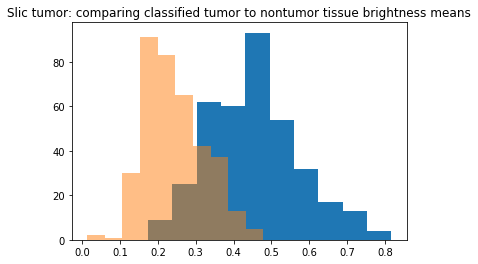

In [19]:
plt.figure()
plt.title("Slic tumor: comparing classified tumor to nontumor tissue brightness means")
plt.hist(tumor_slic_means[:,0])
plt.hist(tumor_slic_means[:,1], alpha = 0.5)
plt.show()

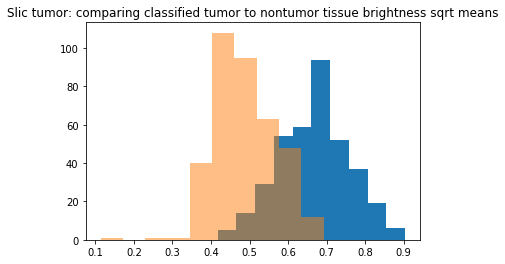

In [20]:
plt.figure()
plt.title("Slic tumor: comparing classified tumor to nontumor tissue brightness sqrt means")
plt.hist(np.sqrt(tumor_slic_means[:,0]))
plt.hist(np.sqrt(tumor_slic_means[:,1]), alpha = 0.5)
plt.show()

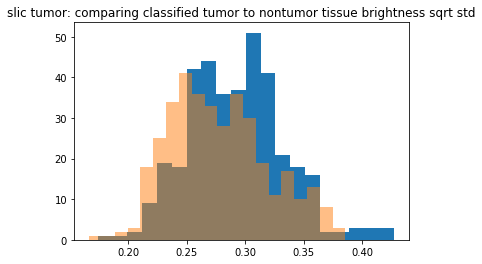

In [21]:
plt.figure()
plt.title("slic tumor: comparing classified tumor to nontumor tissue brightness sqrt std")
plt.hist(np.sqrt(tumor_slic_std[:,0]),  bins=20)
plt.hist(np.sqrt(tumor_slic_std[:,1]), alpha = 0.5, bins=20)
plt.show()

In [22]:
tumor_slic_mean_dif= tumor_slic_means[:,0]-tumor_slic_means[:,1]
tumor_slic_std_dif= tumor_slic_std[:,0]-tumor_slic_std[:,1]

# Slic compare tumor and nontumor tissue

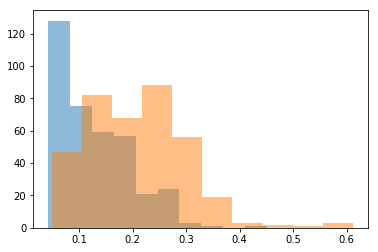

In [23]:
plt.figure()
plt.hist(clean_slic_mean_dif, alpha=0.5)
plt.hist(tumor_slic_mean_dif, alpha=0.5)
plt.show()

In [24]:
np.min(tumor_slic_mean_dif)

0.04890872535689114

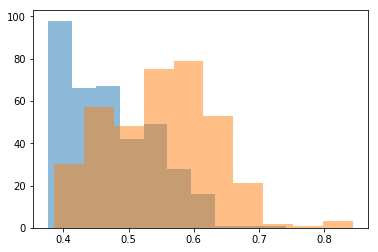

In [25]:
plt.figure()
plt.hist(np.sqrt(clean_slic_mean_dif+0.1), alpha=0.5)
plt.hist(np.sqrt(tumor_slic_mean_dif+0.1), alpha=0.5)
plt.show()

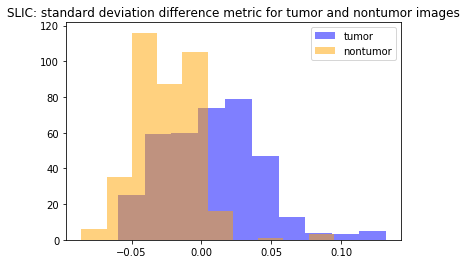

In [26]:
plt.figure()
plt.title("SLIC: standard deviation difference metric for tumor and nontumor images")

plt.hist(tumor_slic_std_dif, color = "blue", alpha=0.5, label="tumor")
plt.hist(clean_slic_std_dif, color="orange", label="nontumor", alpha = 0.5)
plt.legend()
plt.show()

# Kmeans nontumor

In [27]:
'''
Record means of all nontumor images 
'''

def gather_kmeans_clean_loop(path):  
    tolerance =0
    data_id = path.parts[len(path.parts)-1]
    
    print(data_id)
    #classified
    classified_img = np.load(path)
    #original image 
    og_image_path = path_to_augmented_clean+data_id
    og_image = np.load(og_image_path)
    #normalized original image
    max_val = np.max(og_image)
    min_val = np.min(og_image)
    og_image_norm = (og_image - min_val)/(max_val - min_val)
    #extract tumor
    tumor_label=np.max(classified_img)
    print("tumor label", tumor_label)
    tumor = og_image_norm[classified_img==tumor_label]
    tumor= tumor[tumor > tolerance]
    tumor_mean = np.mean(tumor)
    print("tumor mean ", tumor_mean)
    tumor_std = np.std(tumor)
    #extract nontumor
    nontumor=og_image_norm[classified_img != tumor_label]
    nontumor= nontumor[nontumor > tolerance]
    nontumor_mean= np.mean(nontumor)
    print("nontumor mean", nontumor_mean)
    nontumor_std=np.std(nontumor)
    
    return np.array([tumor_mean, nontumor_mean, tumor_std, nontumor_std])

In [28]:
#list comprehension
clean_kmeans_metrics = [gather_kmeans_clean_loop(path) for path in pathlib.Path(path_to_control_kmeans).iterdir()]


BraTS20_Training_101_clean.npy
tumor label 1
tumor mean  0.21172001400946924
nontumor mean 0.12168331789381466
BraTS20_Training_349_clean.npy
tumor label 1
tumor mean  0.376933
nontumor mean 0.2411163
BraTS20_Training_127_clean.npy
tumor label 2
tumor mean  0.32896340682054187
nontumor mean 0.20212428631809295
BraTS20_Training_035_clean.npy
tumor label 2
tumor mean  0.31261554062131935
nontumor mean 0.1765026035715345
BraTS20_Training_111_clean.npy
tumor label 3
tumor mean  0.2722901541070503
nontumor mean 0.17206480903810328
BraTS20_Training_299_clean.npy
tumor label 3
tumor mean  0.453161141619627
nontumor mean 0.3034226279522347
BraTS20_Training_215_clean.npy
tumor label 0
tumor mean  0.2898427968423826
nontumor mean nan
BraTS20_Training_097_clean.npy


/N/soft/rhel7/anaconda/python3.7/2019.03/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/N/soft/rhel7/anaconda/python3.7/2019.03/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/N/soft/rhel7/anaconda/python3.7/2019.03/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/N/soft/rhel7/anaconda/python3.7/2019.03/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/N/soft/rhel7/anaconda/python3.7/2019.03/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tumor label 2
tumor mean  0.3164034518785435
nontumor mean 0.18251060665590907
BraTS20_Training_352_clean.npy
tumor label 3
tumor mean  0.6180847
nontumor mean 0.3905251
BraTS20_Training_145_clean.npy
tumor label 2
tumor mean  0.5171197881463311
nontumor mean 0.2940392323617471
BraTS20_Training_175_clean.npy
tumor label 3
tumor mean  0.4642302303660582
nontumor mean 0.3310014289861045
BraTS20_Training_053_clean.npy
tumor label 2
tumor mean  0.43105542217944787
nontumor mean 0.3008905220160689
BraTS20_Training_169_clean.npy
tumor label 2
tumor mean  0.39593386252495055
nontumor mean 0.2702345042159887
BraTS20_Training_291_clean.npy
tumor label 3
tumor mean  0.2887557876132267
nontumor mean 0.19949557940502424
BraTS20_Training_117_clean.npy
tumor label 2
tumor mean  0.28802099703123063
nontumor mean 0.1760928148248721
BraTS20_Training_027_clean.npy
tumor label 2
tumor mean  0.3667799085441346
nontumor mean 0.2322789429808197
BraTS20_Training_210_clean.npy
tumor label 3
tumor mean  0.4256

tumor label 1
tumor mean  0.4663783813732894
nontumor mean 0.3645373615333949
BraTS20_Training_207_clean.npy
tumor label 2
tumor mean  0.3777871642820142
nontumor mean 0.2651091127528267
BraTS20_Training_161_clean.npy
tumor label 1
tumor mean  0.4932212925942716
nontumor mean 0.35189252950432043
BraTS20_Training_301_clean.npy
tumor label 1
tumor mean  0.34588742105591297
nontumor mean 0.2369571783341284
BraTS20_Training_043_clean.npy
tumor label 2
tumor mean  0.357962974840063
nontumor mean 0.22804564839895952
BraTS20_Training_252_clean.npy
tumor label 1
tumor mean  0.43852309184387916
nontumor mean 0.32571586588416357
BraTS20_Training_348_clean.npy
tumor label 2
tumor mean  0.51451033
nontumor mean 0.39925212
BraTS20_Training_096_clean.npy
tumor label 1
tumor mean  0.2563740109969905
nontumor mean 0.1616442083601168
BraTS20_Training_344_clean.npy
tumor label 2
tumor mean  0.5091445
nontumor mean 0.38145182
BraTS20_Training_304_clean.npy
tumor label 1
tumor mean  0.4082443666918693
non

tumor label 2
tumor mean  0.28290474712729086
nontumor mean 0.1995392964212232
BraTS20_Training_032_clean.npy
tumor label 2
tumor mean  0.27771171252245364
nontumor mean 0.17886135436013706
BraTS20_Training_164_clean.npy
tumor label 2
tumor mean  0.35231466820562785
nontumor mean 0.2265703619425155
BraTS20_Training_074_clean.npy
tumor label 3
tumor mean  0.43124043372899923
nontumor mean 0.13684318522442224
BraTS20_Training_268_clean.npy
tumor label 1
tumor mean  0.4453041596116278
nontumor mean 0.287132665831176
BraTS20_Training_104_clean.npy
tumor label 2
tumor mean  0.3495823776197608
nontumor mean 0.16095425918827697
BraTS20_Training_218_clean.npy
tumor label 2
tumor mean  0.39639339414092295
nontumor mean 0.2628750685579502
BraTS20_Training_086_clean.npy
tumor label 3
tumor mean  0.2598523075787042
nontumor mean 0.16204488079564652
BraTS20_Training_080_clean.npy
tumor label 3
tumor mean  0.3039543698383012
nontumor mean 0.189216270885032
BraTS20_Training_029_clean.npy
tumor label 

tumor label 3
tumor mean  0.32423579792810536
nontumor mean 0.23312356589624084
BraTS20_Training_067_clean.npy
tumor label 3
tumor mean  0.3104087546279829
nontumor mean 0.19994066488935835
BraTS20_Training_360_clean.npy
tumor label 3
tumor mean  0.55900943
nontumor mean 0.34472892
BraTS20_Training_195_clean.npy
tumor label 1
tumor mean  0.4941375219686684
nontumor mean 0.2840903311124764
BraTS20_Training_068_clean.npy
tumor label 3
tumor mean  0.28646682293619596
nontumor mean 0.19623740036310944
BraTS20_Training_361_clean.npy
tumor label 2
tumor mean  0.6152471
nontumor mean 0.44487542
BraTS20_Training_160_clean.npy
tumor label 3
tumor mean  0.41198148190181244
nontumor mean 0.29292913408429566
BraTS20_Training_312_clean.npy
tumor label 2
tumor mean  0.5540523062349044
nontumor mean 0.4322524378736834
BraTS20_Training_216_clean.npy
tumor label 2
tumor mean  0.2975874044538164
nontumor mean 0.21383172834924555
BraTS20_Training_205_clean.npy
tumor label 2
tumor mean  0.38633863777104
n

/N/soft/rhel7/anaconda/python3.7/2019.03/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/N/soft/rhel7/anaconda/python3.7/2019.03/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


tumor label 3
tumor mean  0.464994114258649
nontumor mean 0.35112862444544857
BraTS20_Training_260_clean.npy
tumor label 3
tumor mean  0.17654473872404966
nontumor mean 0.12090304298551949
BraTS20_Training_151_clean.npy
tumor label 2
tumor mean  0.3973401747766936
nontumor mean 0.31557387468696485
BraTS20_Training_073_clean.npy
tumor label 3
tumor mean  0.30107479113539254
nontumor mean 0.18743090944508733
BraTS20_Training_178_clean.npy
tumor label 3
tumor mean  0.4479000863152723
nontumor mean 0.31690650326428993
BraTS20_Training_118_clean.npy
tumor label 1
tumor mean  0.3422391905620277
nontumor mean 0.20843346366566282
BraTS20_Training_341_clean.npy
tumor label 1
tumor mean  0.517174
nontumor mean 0.03186481
BraTS20_Training_229_clean.npy
tumor label 2
tumor mean  0.4284893173306096
nontumor mean 0.31975865827163924
BraTS20_Training_056_clean.npy
tumor label 3
tumor mean  0.3571683219591698
nontumor mean 0.24504034376675718
BraTS20_Training_251_clean.npy
tumor label 3
tumor mean  0.

# How can nontumor tissue be brighter than tumor tissue?

In [29]:
mask_127 = np.load(path_to_control_kmeans+"BraTS20_Training_127_clean.npy")

In [30]:
brain_127 = np.load(path_to_augmented_clean+"BraTS20_Training_127_clean.npy")

In [31]:
index=60

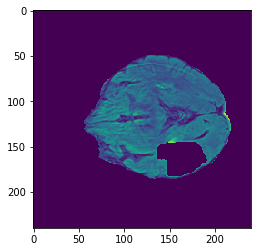

In [32]:
plt.figure()
plt.imshow(brain_127[:,:,60])

In [33]:
np.unique(mask_127)

array([0, 2], dtype=int32)

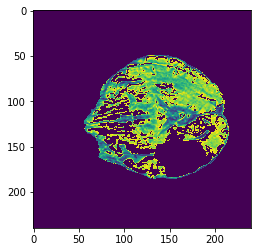

In [34]:
plt.figure()
nontumor_hat = brain_127[:,:,index].copy()
mask_hat = mask_127[:,:,index].copy()
nontumor_hat[mask_hat==np.max(mask_127)]=0
plt.imshow(nontumor_hat)

In [35]:
np.mean(nontumor_hat>0)

0.1806076388888889

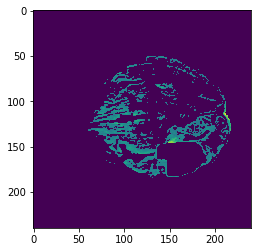

In [36]:
plt.figure()
tumor_hat = brain_127[:,:,index].copy()
mask_hat = mask_127[:,:,index].copy()
tumor_hat[mask_hat!=np.max(mask_127)]=0
plt.imshow(tumor_hat)

In [37]:
np.mean(tumor_hat>0)

0.07458333333333333

In [38]:
clean_kmeans_metrics = np.asarray(clean_kmeans_metrics)

In [39]:
clean_kmeans_means = clean_kmeans_metrics[:,0:2]
clean_kmeans_std = clean_kmeans_metrics[:,2:4] 
clean_kmeans_var = clean_kmeans_std **2

/N/soft/rhel7/anaconda/python3.7/2019.03/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/N/soft/rhel7/anaconda/python3.7/2019.03/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


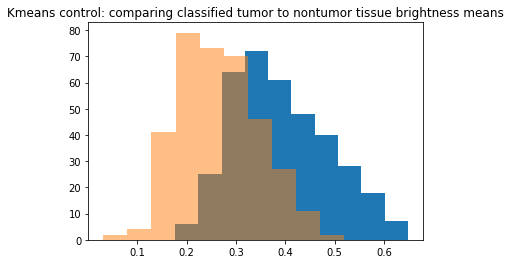

In [40]:
plt.figure()
plt.title("Kmeans control: comparing classified tumor to nontumor tissue brightness means")
plt.hist(clean_kmeans_means[:,0])
plt.hist(clean_kmeans_means[:,1], alpha = 0.5)
plt.show()

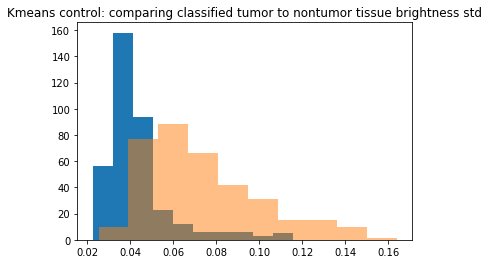

In [41]:
plt.figure()
plt.title("Kmeans control: comparing classified tumor to nontumor tissue brightness std")
plt.hist(clean_kmeans_std[:,0])
plt.hist(clean_kmeans_std[:,1], alpha = 0.5)
plt.show()

# Kmeans tumor

In [42]:
'''
Record means of all tumor images 
'''

def gather_tumor_kmeans_loop(path):  
    tolerance = 0.15
    
    data_id = path.parts[len(path.parts)-1]
    data_id = os.path.splitext(data_id)[0]
    data_id = data_id[0:-11]
    print(data_id)
    #classified
    classified_img = np.load(path)
    #original image 
    og_image_path = path_to_lib+data_id+"/"+data_id+"_flair.nii"
    og_image, affine, im = load_nifti(og_image_path, return_img=True)
    #normalized original image
    max_val = np.max(og_image)
    min_val = np.min(og_image)
    og_image_norm = (og_image - min_val)/(max_val - min_val)
    
    #extract tumor
    tumor_label=np.max(classified_img)
    print(tumor_label)
    tumor = og_image_norm[classified_img==tumor_label]
    tumor=tumor[tumor>tolerance]
    tumor_mean = np.mean(tumor)
    print("tumor mean ", tumor_mean)
    tumor_std=np.std(tumor)
    #extract nontumor
    nontumor=og_image_norm[classified_img != tumor_label]
    nontumor= nontumor[nontumor > tolerance]
    nontumor_mean= np.mean(nontumor)
    nontumor_std=np.std(nontumor)
    print("nontumor mean ", nontumor_mean)
    
    return np.array([tumor_mean, nontumor_mean, tumor_std, nontumor_std])

In [43]:
#list comprehension
tumor_kmeans_metrics = [gather_tumor_kmeans_loop(path) for path in pathlib.Path(path_to_tumor_kmeans).iterdir()]

BraTS20_Training_071
2
tumor mean  0.5147150111026312
nontumor mean  0.25478733718604935
BraTS20_Training_343
2
tumor mean  0.7161966
nontumor mean  0.384187
BraTS20_Training_061
2
tumor mean  0.8189136544473041
nontumor mean  0.2345450581210398
BraTS20_Training_261
2
tumor mean  0.7566273943435428
nontumor mean  0.3910463917560181
BraTS20_Training_067
2
tumor mean  0.5054579130312897
nontumor mean  0.23018086882907401
BraTS20_Training_278
2
tumor mean  0.5218582678616225
nontumor mean  0.3551976395921681
BraTS20_Training_287
3
tumor mean  0.4444309629805864
nontumor mean  0.3350434216944247
BraTS20_Training_298
1
tumor mean  0.5434962636674124
nontumor mean  0.4009913137660826
BraTS20_Training_179
2
tumor mean  0.29246390061737687
nontumor mean  0.17227703440685185
BraTS20_Training_227
2
tumor mean  0.3571050671109389
nontumor mean  0.2653955092401695
BraTS20_Training_009
2
tumor mean  0.38816910819973627
nontumor mean  0.1922971786406609
BraTS20_Training_349
2
tumor mean  0.5387138
n

2
tumor mean  0.26948185951468984
nontumor mean  0.19545147537753935
BraTS20_Training_333
2
tumor mean  0.6577824206460341
nontumor mean  0.31021169511731617
BraTS20_Training_134
1
tumor mean  0.3944321399455508
nontumor mean  0.29279853300499015
BraTS20_Training_289
2
tumor mean  0.5763500186516659
nontumor mean  0.2956216039317526
BraTS20_Training_085
3
tumor mean  0.41430799843198385
nontumor mean  0.22223564581113314
BraTS20_Training_167
2
tumor mean  0.5591082763069034
nontumor mean  0.40240153429377595
BraTS20_Training_319
2
tumor mean  0.7150851143009588
nontumor mean  0.4495387830557183
BraTS20_Training_213
2
tumor mean  0.5823277214450543
nontumor mean  0.443606687933411
BraTS20_Training_354
2
tumor mean  0.581516
nontumor mean  0.411986
BraTS20_Training_340
2
tumor mean  0.5263929
nontumor mean  0.40310657
BraTS20_Training_101
2
tumor mean  0.390715194047308
nontumor mean  0.18619541294278572
BraTS20_Training_331
2
tumor mean  0.67627978194345
nontumor mean  0.351567258468286

2
tumor mean  0.5754464208920923
nontumor mean  0.39648044617226175
BraTS20_Training_332
3
tumor mean  0.5603261654483179
nontumor mean  0.32735017516213805
BraTS20_Training_224
2
tumor mean  0.49269054426440123
nontumor mean  0.19345015742055313
BraTS20_Training_236
2
tumor mean  0.5017048333303249
nontumor mean  0.32293491036224464
BraTS20_Training_357
2
tumor mean  0.4832376
nontumor mean  0.35281146
BraTS20_Training_345
3
tumor mean  0.72887415
nontumor mean  0.4238603
BraTS20_Training_270
2
tumor mean  0.5845328893216164
nontumor mean  0.42851509881206584
BraTS20_Training_129
3
tumor mean  0.39841597738986306
nontumor mean  0.2800205964454787
BraTS20_Training_169
1
tumor mean  0.43969467208772955
nontumor mean  0.3060718748330836
BraTS20_Training_177
1
tumor mean  0.41663861299901034
nontumor mean  0.3146328643863864
BraTS20_Training_191
3
tumor mean  0.3785031402901414
nontumor mean  0.22468286880831395
BraTS20_Training_139
3
tumor mean  0.5098342355489733
nontumor mean  0.376663

0
tumor mean  0.43834639365620687
nontumor mean  nan
BraTS20_Training_087
1
tumor mean  0.42380224363914226
nontumor mean  0.30147897292706605
BraTS20_Training_080
2
tumor mean  0.43496492134250386
nontumor mean  0.22017116476593707
BraTS20_Training_316
3
tumor mean  0.49913544624600636
nontumor mean  0.29247668606354377
BraTS20_Training_325
3
tumor mean  0.33502426535361635
nontumor mean  0.2556600926948047
BraTS20_Training_113
2
tumor mean  0.5768827229177991
nontumor mean  0.26829688956313524
BraTS20_Training_228
3
tumor mean  0.6559240249700935
nontumor mean  0.48582003942439117
BraTS20_Training_308
2
tumor mean  0.46714987121103574
nontumor mean  0.3662390069016661
BraTS20_Training_237
3
tumor mean  0.7281582130929861
nontumor mean  0.4305165236446783
BraTS20_Training_083
2
tumor mean  0.5611877786140935
nontumor mean  0.22342275197058575
BraTS20_Training_075
3
tumor mean  0.6921885151740292
nontumor mean  0.2125691714322229
BraTS20_Training_321
2
tumor mean  0.552033555413635
non

In [44]:
tumor_kmeans_metrics = np.asarray(tumor_kmeans_metrics)

In [45]:
tumor_kmeans_means = tumor_kmeans_metrics[:,0:2]
tumor_kmeans_std = tumor_kmeans_metrics[:,2:4] 
tumor_kmeans_var = tumor_kmeans_std **2

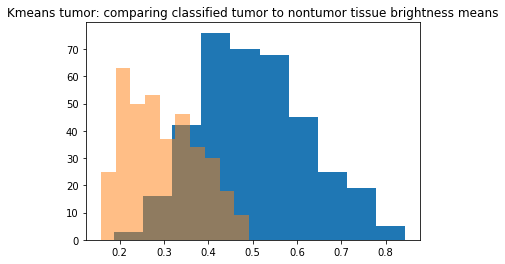

In [46]:
plt.figure()
plt.title("Kmeans tumor: comparing classified tumor to nontumor tissue brightness means")
plt.hist(tumor_kmeans_means[:,0])
plt.hist(tumor_kmeans_means[:,1], alpha = 0.5)
plt.show()

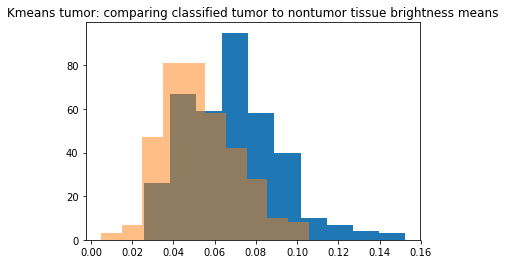

In [47]:
plt.figure()
plt.title("Kmeans tumor: comparing classified tumor to nontumor tissue brightness means")
plt.hist(tumor_kmeans_std[:,0])
plt.hist(tumor_kmeans_std[:,1], alpha = 0.5)
plt.show()

# Compare kmeans control and tumor metrics


In [48]:
tumor_kmeans_mean_dif= tumor_kmeans_means[:,0]-tumor_kmeans_means[:,1]
tumor_kmeans_std_dif= tumor_kmeans_std[:,0]-tumor_kmeans_std[:,1]

In [49]:
clean_kmeans_mean_dif= clean_kmeans_means[:,0]-clean_kmeans_means[:,1]
clean_kmeans_std_dif= clean_kmeans_std[:,0]-clean_kmeans_std[:,1]

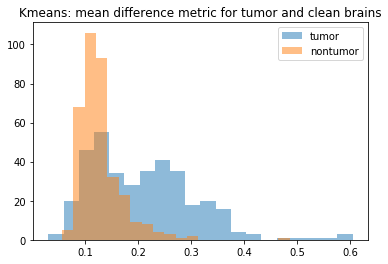

In [50]:
plt.figure()
plt.title("Kmeans: mean difference metric for tumor and clean brains")
plt.hist(tumor_kmeans_mean_dif, bins=20, alpha = 0.5, label="tumor")
plt.hist(clean_kmeans_mean_dif, bins=20, alpha = 0.5, label = "nontumor")
plt.legend()
plt.show()

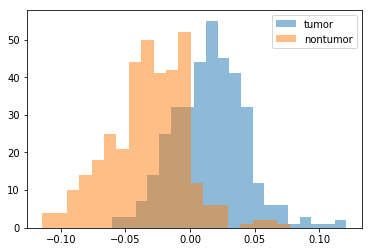

In [51]:
plt.figure()
plt.hist(tumor_kmeans_std_dif, bins=20, alpha = 0.5, label="tumor")
plt.hist(clean_kmeans_std_dif, bins=20, alpha = 0.5, label = "nontumor")
plt.legend()
plt.show()

# 2 best results

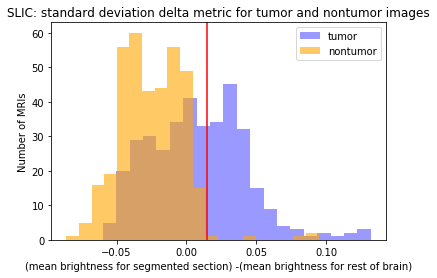

In [52]:
plt.figure()
plt.title("SLIC: standard deviation delta metric for tumor and nontumor images")

plt.hist(tumor_slic_std_dif, color = "blue", bins=20, alpha=0.4, label="tumor")
plt.hist(clean_slic_std_dif, color="orange", bins=20,label="nontumor", alpha = 0.6)
plt.axvline(0.015, color="red")
plt.xlabel("(mean brightness for segmented section) -(mean brightness for rest of brain)")
plt.ylabel("Number of MRIs")
plt.legend()
plt.show()

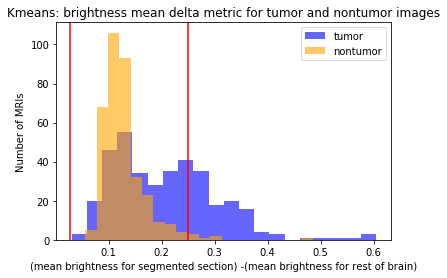

In [53]:
plt.figure()
plt.title("Kmeans: brightness mean delta metric for tumor and nontumor images")
plt.hist(tumor_kmeans_mean_dif, bins=20, alpha = 0.6, color="blue", label="tumor")
plt.hist(clean_kmeans_mean_dif, bins=20, alpha = 0.6, color="orange", label = "nontumor")
plt.xlabel("(mean brightness for segmented section) -(mean brightness for rest of brain)")
plt.ylabel("Number of MRIs")
plt.axvline(0.027, color="red")
plt.axvline(0.25, color="red")
plt.legend()
plt.show()